In [1]:
# test TS -- KAGGLE --- Source -- https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

import math
import statistics
import numpy as np 
import scipy.stats

from sklearn import datasets

# iris = datasets.load_iris()
# print(type(iris))

import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
#from subprocess import check_output
#print(check_output(['ls', '../input']).decode('utf-8'))

# test = pd.read_csv("/home/dhankar/data_1/test.csv")
# train = pd.read_csv("/home/dhankar/data_1/train.csv")

print(test.shape) # there are -== ROWS Count ==  45000 - (45000, 4)
print(train.shape) # there are -== ROWS Count == 913000- (913000, 4) 


(45000, 4)
(913000, 4)


In [3]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB
None


In [5]:
test.isnull().sum() # No NULL Values in any columns 

id       0
date     0
store    0
item     0
dtype: int64

In [6]:
print(train.describe()) # Summary Stats for the TRAIN data set 
## data for Item and Sales is given for - 10 DIFF STORES 

               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000


In [7]:
# change the Format of the DATE Column 
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
print(train.head(2))
print(train.tail(2))
print("   "*90)
print("- Seen below DATA TYPE for DATE COLUMN - changed to -- datetime64[ns] ,earlier was DTYPE OBJECT == STRING")
print(train.info())
print("   "*90)
print("-Seen below SORTED the TRAIN DATA basis COLUMN == STORE ")
print(train.sort_values(by=['store']))

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
             date  store  item  sales
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82
                                                                                                                                                                                                                                                                              
- Seen below DATA TYPE for DATE COLUMN - changed to -- datetime64[ns] ,earlier was DTYPE OBJECT == STRING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int

In [8]:


# per 1 store, 1 item
#train_df = train[train['store']==1] ## why does the Original Author of the code on KAGGLE
#start with store==1 ? We have 10 Stores to choose from ?

train_df = train[train['store']==2]
# print(train_df.store.value_counts())
# print(train_df.item.value_counts())

print(type(train_df.item.value_counts()))

a_sl = train_df.sales.value_counts()
print(type(a_sl))

print("   "*90)
print("---- Seen below SORTED the TRAIN DF basis COLUMN == SALES , we have only values for STORE == 2 ")
print(train_df.sort_values(by=['sales']))
print("   "*90)
print("---- Seen above , MAX Value for SALES == 231 , same we saw in ")

train_df = train_df[train['item']==1]
# train_df = train_df.set_index('date')
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
print("   "*90)
print(train_df.head())
print(train_df.tail())


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
                                                                                                                                                                                                                                                                              
---- Seen below SORTED the TRAIN DF basis COLUMN == SALES , we have only values for STORE == 2 
             date  store  item  sales
75222  2013-12-23      2     5      3
74866  2013-01-01      2     5      4
732262 2013-02-06      2    41      5
841788 2013-01-03      2    47      5
476601 2013-01-16      2    27      6
...           ...    ...   ...    ...
313889 2017-07-02      2    18    208
258759 2016-07-17      2    15    209
222596 2017-07-09      2    13    210
386579 2016-07-17      2    22    214
259109 2017-07-02      2    15    231

[91300 rows x 4 columns]
                                                                               

In [9]:
### Test Set >> test_df
# per 1 store, 1 item
#test_df = test[test['store']==1] #original code - store ==1 
test_df = test[test['store']==2]
test_df = train_df[train['item']==1]
# train_df = train_df.set_index('date')
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
print(train_df.head())
print(train_df.tail())

           date  store  item  sales  year  month  day  weekday
1826 2013-01-01      2     1     12  2013      1    1        1
1827 2013-01-02      2     1     16  2013      1    2        2
1828 2013-01-03      2     1     16  2013      1    3        3
1829 2013-01-04      2     1     20  2013      1    4        4
1830 2013-01-05      2     1     16  2013      1    5        5
           date  store  item  sales  year  month  day  weekday
3647 2017-12-27      2     1     19  2017     12  361        2
3648 2017-12-28      2     1     21  2017     12  362        3
3649 2017-12-29      2     1     18  2017     12  363        4
3650 2017-12-30      2     1     24  2017     12  364        5
3651 2017-12-31      2     1     31  2017     12  365        6


<AxesSubplot:xlabel='date', ylabel='sales'>

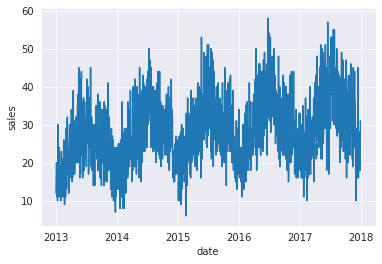

In [10]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)


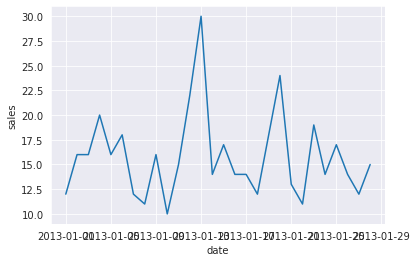

In [11]:
dt_sales_plt = sns.lineplot(x="date", y="sales",legend = 'brief' , data=train_df[:28])

#dt_sales_plt.xticks(rotation=45)
#dt_sales_plt.show()

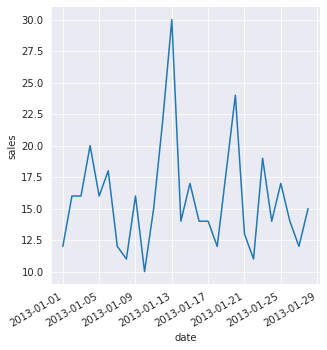

In [12]:
g = sns.relplot(x="date", y="sales", kind="line", data=train_df[:28])
g.figure.autofmt_xdate()
## dates re-aligned and readable 

<AxesSubplot:xlabel='weekday', ylabel='sales'>

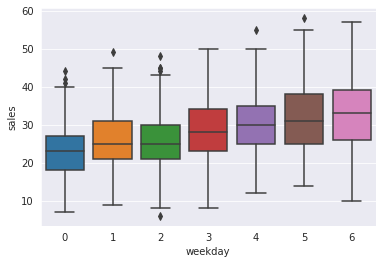

In [14]:
sns.boxplot(x="weekday", y="sales", data=train_df)
# Sales are Highest on the 6th DAY - also not many Outliers on 6th Day 
# Spread of the SALES value is also wider on Weekends 
# Monday=0, Sunday=6.

In [ ]:
# Looking at the CORRELATION between WeekDays and Sales 


# we can also use .corr to determine the corelation between the variables 
df.corr()



In [13]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


While Comparing the - multiplicative and the additive DECOMPOSITION
We can see the DIFF between the SEASONAL and RESIDUALS part - the measures are DIFF 
The TREND is the same ( atleast as seen on th GRAPH below - for both the  multiplicative and the additive DECOMPOSITION )

<Figure size 432x288 with 0 Axes>

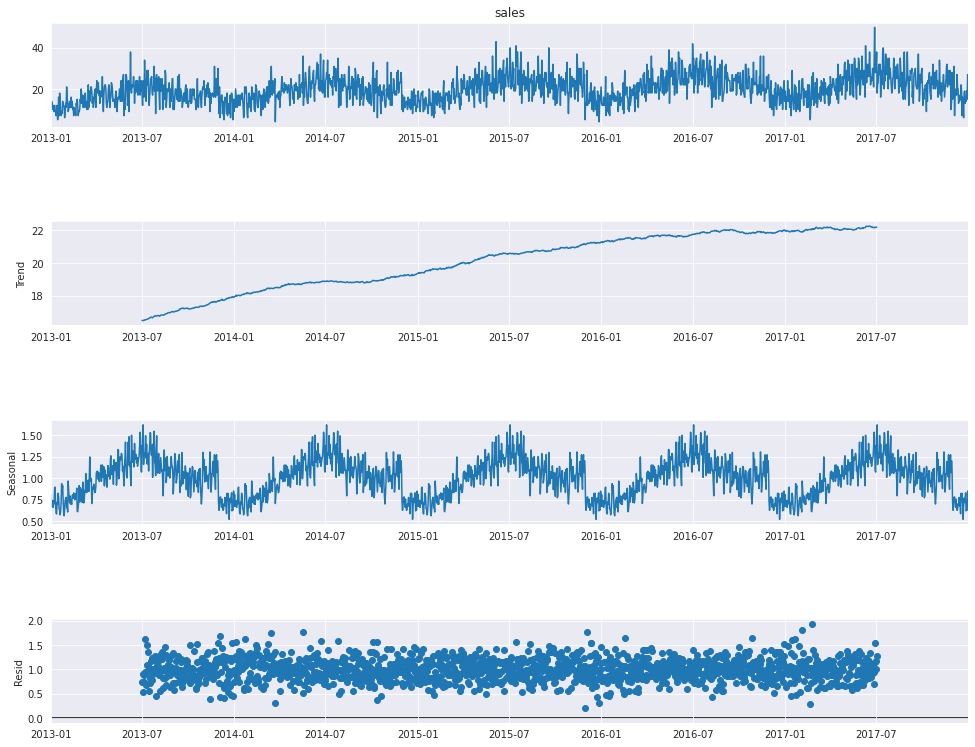

In [14]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(train_df['sales'], model='additive', freq=365)
#multiplicative
result = seasonal_decompose(train_df['sales'], model='multiplicative', freq=365)
# FOOBAR -- While Comparing the - multiplicative and the additive DECOMPOSITION 
# We can clearly see a Diffrence between the 

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

<Figure size 432x288 with 0 Axes>

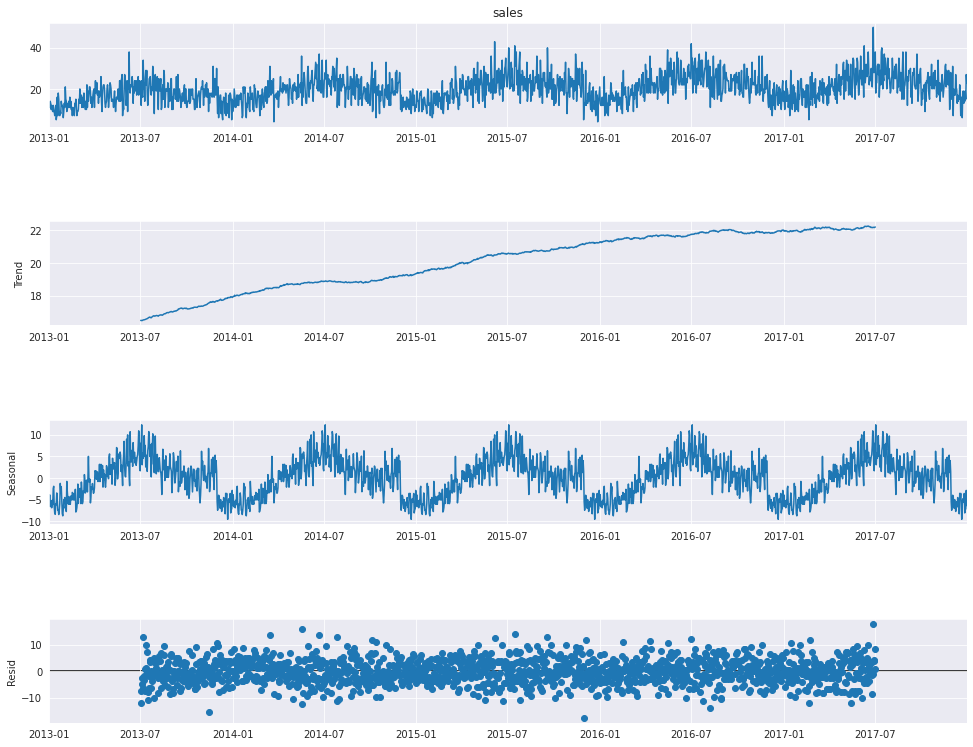

In [15]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', freq=365)


fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [ ]:
# This is a naive decomposition. More sophisticated methods should be preferred.

# The additive model is Y[t] = T[t] + S[t] + e[t]

# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

# The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

In [16]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html



In [17]:
# STATIONARY TS 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

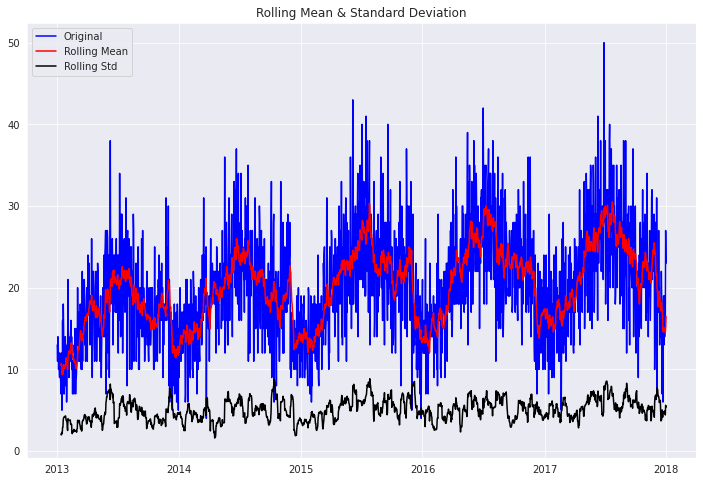

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [18]:
test_stationarity(train_df['sales'])

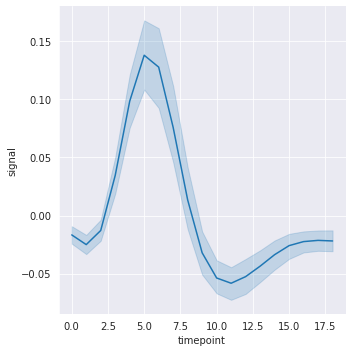

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri); #
# this SEMICOLON -- will disable the - stack trace prints 